In [1]:
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.fftpack import fftshift, ifftshift
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import time
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, interactive, Layout, Dropdown, IntText, HBox, VBox, Output
from IPython.display import display, clear_output
print("Libraries added successfully!")

Libraries added successfully!


In [2]:
s=2
print('s =',s)

s = 2


In [3]:
v=np.array([1,5,9])
print('v =',v)

v = [1 5 9]


In [4]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('a =',a)

a = [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
a+5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [6]:
b=s*v*2
print('b=',b)

b= [ 4 20 36]


In [7]:
np.multiply(v,b)

array([  4, 100, 324])

In [8]:
len(v)

3

In [9]:
a.shape   # για array: np.array(a.shape)

(3, 3)

In [10]:
a[0,1] # Η δεικτοδότηση αρχίζει από το 0

2

In [11]:
a[1,-1] # Αρνητικές τιμές μετρούν από το τέλος, π.χ. το -1 αναφέρεται στο τελευταίο στοιχείο

6

In [12]:
v1 = v[1:3]
v2 = v[1:2]
print('v1 =',v1)
print('v2 =',v2)
# ΠΡΟΣΟΧΗ: τα στοιχεία [2ο,3ο] δίνονται ως 1:3 και όχι ως 1:2

v1 = [5 9]
v2 = [5]


In [13]:
a[0:2,:] # Ομοίως: οι γραμμές 1 & 2 δίνονται ως 0:2 και όχι ως 0:1

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
t=np.arange(0,0.5,0.1)
print('t=',t)

t= [0.  0.1 0.2 0.3 0.4]


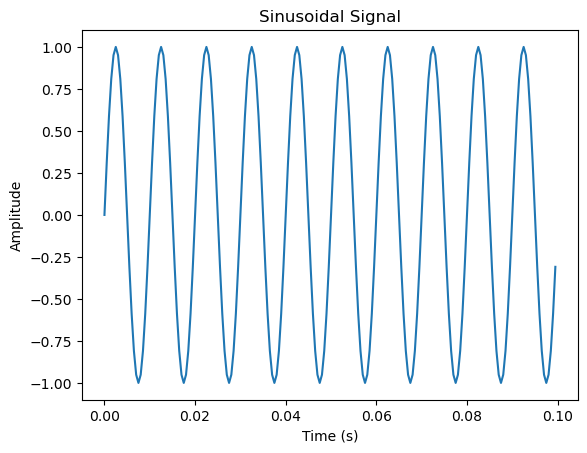

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 2.1 Create a Sinusoidal Signal
# ==============================================================================
Fs = 2000                  # Sampling frequency in Hz
Ts = 1 / Fs                # Sampling period in seconds
T = 0.1                    # Signal duration in seconds
t = np.arange(0, T, Ts)    # Time vector for signal
A = 1                      # Signal amplitude
x = A * np.sin(2 * np.pi * 100 * t)  # Generate sinusoidal signal
L = len(x)                 # Length of the signal

# Plot the sinusoidal signal in time domain
plt.figure()
plt.plot(t, x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show(block=False)

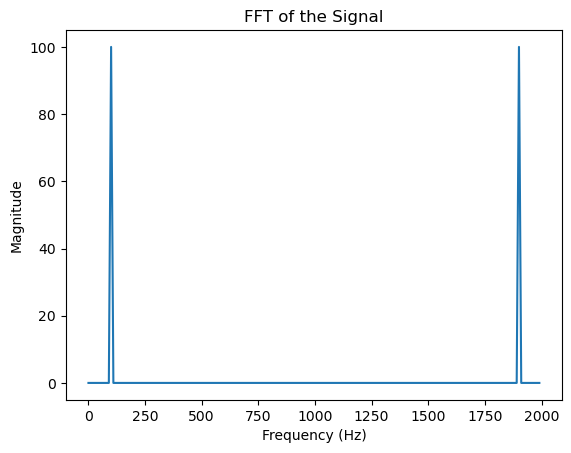

In [16]:
# ==============================================================================
# 2.2 Plot Fourier Transform (FT) of the Signal
# ==============================================================================
N = 1 * L                  # Length of Fourier Transform
Fo = Fs / N                # Frequency resolution
Fx = np.fft.fft(x, N)      # Discrete Fourier Transform (DFT) of the signal
freq = np.arange(0, N) * Fo  # Frequency vector

# Plot the magnitude of the DFT
plt.figure()
plt.plot(freq, np.abs(Fx))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show(block=False)


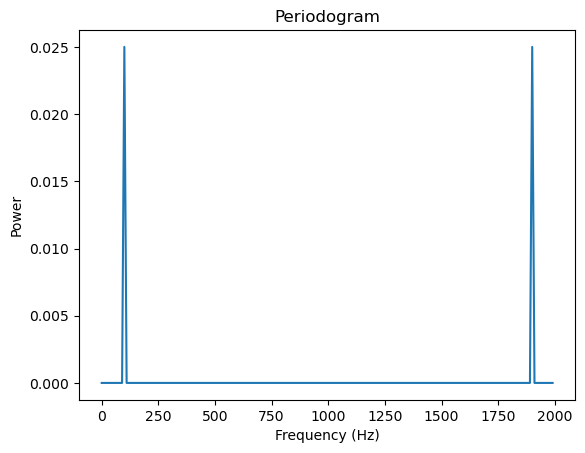

In [17]:
# ==============================================================================
# 2.3 Plot Signal Periodogram
# ==============================================================================
power = ((Fx * np.conj(Fx)) / (Fs * L)).real  # Calculate spectral density

plt.figure()
plt.plot(freq, power)
plt.title('Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show(block=False)

In [18]:
# ==============================================================================
# 2.4 Calculate Signal Power
# ==============================================================================
power_theory = A**2 / 2                # Theoretical power based on signal amplitude
dB = 10 * np.log10(power_theory)       # Convert power to decibels (dB)
power_time_domain = np.sum(np.abs(x)**2) / L  # Calculate power in time domain
power_frequency_domain = np.sum(power * Fo).real  # Calculate power in frequency domain

# Display calculated power values
print(f'Power (Theory): {power_theory}')
print(f'Power (dB): {dB}')
print(f'Power (Time Domain): {power_time_domain}')
print(f'Power (Frequency Domain): {power_frequency_domain}')

Power (Theory): 0.5
Power (dB): -3.010299956639812
Power (Time Domain): 0.5000000000000001
Power (Frequency Domain): 0.5000000000000001


In [19]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html1 = widgets.HTML(
  value=loading
)
timer_html1 = widgets.HTML(
    value="Elapsed time: - seconds"
)

# Function to calculate the next highest power of 2
def nextpow2(i):
    n = 1
    while n < i:
        n *= 2
    return n

# Output widget where plots will be displayed
plot_output1 = widgets.Output()

# Callback function to update graphs
def update_plots1(freq1, freq2, freq3):
    # Start timer
    loader_html1.value = loading
    start_time = time.time()
    
    Fs = 8000  # Hardcoded for simplicity, adjust as needed
    Ts = 1 / Fs
    L = Fs
    T = L * Ts
    t = np.arange(0, L) * Ts  # Adjusted to include the last sample
    
    global new_x
    new_x = np.sin(2 * np.pi * freq1 * t) \
            + 0.8 * np.sin(2 * np.pi * freq2 * t) \
            + np.sin(2 * np.pi * freq3 * t)

    if any(freq < 0 for freq in [freq1, freq2, freq3]) or any(freq > 3900 for freq in [freq1, freq2, freq3]):
        # Clear the output and display a warning message if any frequency is greater than 500
        with plot_output1:
            plot_output1.clear_output(wait=True)
            warning_html1 = widgets.HTML(
                value="<div style='color: black; background-color: #ffffcc; padding: 10px; border-radius: 5px; font-size: 16px; text-align: center;'>" 
                      "<b>⚠️ Warning:</b> Frequency should not exceed 3900 and must be non-negative!</div>",
                placeholder='',
                description='',
            )
            display(warning_html1)
            # Show elapsed time
            elapsed_time = time.time() - start_time
            timer_html1.value = f"Elapsed time: {elapsed_time:.2f} seconds"
            loader_html1.value = done
    else:
        with plot_output1:
            plot_output1.clear_output(wait=True)  # Clear previous outputs

            # Plotting
            fig, axs = plt.subplots(4, 1, figsize=(12, 20))
            
            # Calculate the midpoint of the arrays
            point = len(new_x) // 10

            # Plotting only the first half of new_x
            axs[0].plot(t[:point], new_x[:point], color='#00CC96')
            axs[0].set_title('Time domain plot of x')
            axs[0].set_xlabel('t (sec)')
            axs[0].set_ylabel('Amplitude')
            axs[0].grid(True)

            N = nextpow2(L)                 # Length of Fourier transform
            Fo = Fs / N                     # Frequency resolution
            f = np.arange(0, N) * Fo        # Frequency vector
            X = np.fft.fft(new_x, N)            # Compute DFT for N points

            # Frequency domain plot
            axs[1].plot(f[1:N], abs(X[1:N]), color='#1F77B4')
            axs[1].set_title('Frequency domain plot of x')
            axs[1].set_xlabel('f (Hz)')
            axs[1].set_ylabel('Amplitude')
            axs[1].grid(True)

            # Shift frequencies to center
            f = f - Fs / 2
            X = np.fft.fftshift(X)

            # Two-sided spectrum of x
            f_shifted = f 

            # Two-sided spectrum plot
            axs[2].plot(f_shifted, abs(X), color='#1F77B4')
            axs[2].set_title('Two sided spectrum of x')
            axs[2].set_xlabel('f (Hz)')
            axs[2].set_ylabel('Amplitude')
            axs[2].grid(True)

            # Calculate power
            power = np.multiply(X, np.conj(X)) / N / L

            # Periodogram plot
            axs[3].plot(f_shifted, power.real, color='#1F77B4')
            axs[3].set_title('Periodogram')
            axs[3].set_xlabel('Frequency (Hz)')
            axs[3].set_ylabel('Power')
            axs[3].grid(True)

            plt.tight_layout()
            plt.show()

            # Show elapsed time
            elapsed_time = time.time() - start_time
            timer_html1.value = f"Elapsed time: {elapsed_time:.2f} seconds"
            loader_html1.value = done


# Create three IntText widgets for input frequencies
freq1_input1 = widgets.IntText(value=500, description='Freq 1 (Hz):', min=0, max=3900, continuous_update=False)
freq2_input1 = widgets.IntText(value=1000, description='Freq 2 (Hz):', min=0, max=3900, continuous_update=False)
freq3_input1 = widgets.IntText(value=1500, description='Freq 3 (Hz):', min=0, max=3900, continuous_update=False)

# Group the frequency inputs together
inputs_box = widgets.VBox([freq1_input1, freq2_input1, freq3_input1])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html1, timer_html1], layout=widgets.Layout(margin='0 0 0 40px'))

# Now, place the inputs and the loader/timer horizontally next to each other
ui = widgets.HBox([inputs_box, loader_timer_box])

# Assuming update_graph is already defined and properly set up to update loader_html1 and timer_html1 visibility
out = widgets.interactive_output(update_plots1, {'freq1': freq1_input1, 'freq2': freq2_input1, 'freq3': freq3_input1})

# Display the output below the input and loader/timer
display(ui, plot_output1)


Output()

In [20]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html2 = widgets.HTML(
  value=loading
)
timer_html2 = widgets.HTML(
    value="Elapsed time: - seconds"
)

# Output widget where plots will be displayed
plot_output2 = widgets.Output()

# Function to calculate the next highest power of 2
def nextpow2(i):
    n = 1
    while n < i:
        n *= 2
    return n

# Function to update plots with input frequencies
def update_plots2(freq1, freq2, freq3):
    # Start timer
    loader_html2.value = loading
    start_time = time.time()
    
    Fs = 8000                    # Sampling frequency
    Ts = 1/Fs                    # Sampling period
    L = 8000                     # Length of signal (number of samples)
    T = L * Ts                   # Duration of signal
    t = np.arange(0, L) * Ts     # Time vector, adjusted to include the last sample

    # Create the signal using the three input frequencies
    new_x = np.sin(2*np.pi*freq1*t) + 0.8*np.sin(2*np.pi*freq2*t) + np.sin(2*np.pi*freq3*t)
    rand_n = np.random.randn(len(new_x))  # Generate random noise

    if any(freq < 0 for freq in [freq1, freq2, freq3]) or any(freq > 3900 for freq in [freq1, freq2, freq3]):
        # Clear the output and display a warning message if any frequency is greater than 500
        with plot_output2:
            plot_output2.clear_output(wait=True)
            warning_html2 = widgets.HTML(
                value="<div style='color: black; background-color: #ffffcc; padding: 10px; border-radius: 5px; font-size: 16px; text-align: center;'>" 
                      "<b>⚠️ Warning:</b> Frequency should not exceed 3900 and must be non-negative!</div>",
                placeholder='',
                description='',
            )
            display(warning_html2)
            # Show elapsed time
            elapsed_time = time.time() - start_time
            timer_html2.value = f"Elapsed time: {elapsed_time:.2f} seconds"
            loader_html2.value = done
    else:
        with plot_output2:
            plot_output2.clear_output(wait=True)
            # Plotting setup
            fig, axs = plt.subplots(4, 1, figsize=(12, 20))
            
            # Time domain plot of n
            axs[0].plot(t, rand_n, color='#00CC96')
            axs[0].set_title('Time domain plot of n')
            axs[0].set_xlabel('t (sec)')
            axs[0].set_ylabel('Amplitude')
            axs[0].grid(True)
            
            # Correction for N calculation using bitwise operator
            N = nextpow2(L)  # Corrected the exponentiation operator
            Fo = Fs / N   
            f = np.arange(0, N) * Fo
            f_shifted = f - Fs/2
            rand_N = np.fft.fft(rand_n, N)
            rand_N = np.fft.fftshift(rand_N)
            power_n = np.multiply(rand_N, np.conj(rand_N)) / N / L
            
            # Frequency domain plot of x
            axs[1].plot(f_shifted, power_n.real, color='#1F77B4')
            axs[1].set_title('Frequency domain plot of x')
            axs[1].set_xlabel('f (Hz)')
            axs[1].set_ylabel('Amplitude')
            axs[1].grid(True)
            
            # Two sided spectrum of x
            s = new_x + rand_n
            axs[2].plot(t, s, color='#00CC96')
            axs[2].set_title('Two sided spectrum of x')
            axs[2].set_xlabel('t (sec)')
            axs[2].set_ylabel('Amplitude')
            axs[2].grid(True)
            
            # Two sided spectrum of s
            S = np.fft.fft(s, N)
            S = np.fft.fftshift(S)
            axs[3].plot(f_shifted, np.abs(S), color='#1F77B4')
            axs[3].set_title('Two sided spectrum of s')
            axs[3].set_xlabel('f (Hz)')
            axs[3].set_ylabel('Magnitude')
            axs[3].grid(True)
            
            plt.tight_layout()

            # Show elapsed time
            elapsed_time = time.time() - start_time
            timer_html2.value = f"Elapsed time: {elapsed_time:.2f} seconds"
            loader_html2.value = done

            plt.show()

# Create three IntText widgets for input frequencies
freq1_input2 = widgets.IntText(value=500, description='Freq 1 (Hz):', continuous_update=False)
freq2_input2 = widgets.IntText(value=1000, description='Freq 2 (Hz):', continuous_update=False)
freq3_input2 = widgets.IntText(value=1500, description='Freq 3 (Hz):', continuous_update=False)

# Group the frequency inputs together
inputs_box = widgets.VBox([freq1_input2, freq2_input2, freq3_input2])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html2, timer_html2], layout=widgets.Layout(margin='0 0 0 40px'))

# Now, place the inputs and the loader/timer horizontally next to each other
ui = widgets.HBox([inputs_box, loader_timer_box])

# Assuming update_graph is already defined and properly set up to update loader_html2 and timer_html2 visibility
out = widgets.interactive_output(update_plots2, {
    'freq1': freq1_input2,
    'freq2': freq2_input2,
    'freq3': freq3_input2
})

# Display the output below the input and loader/timer
display(ui, plot_output2)


Output()

In [21]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html3 = widgets.HTML(
  value=loading
)
timer_html3 = widgets.HTML(
    value="Elapsed time: - seconds"
)

# Output widget where plots or warnings will be displayed
plot_output3 = widgets.Output()

# Function to calculate the next highest power of 2
def nextpow2(i):
    n = 1
    while n < i:
        n *= 2
    return n

# Function to update plots with input frequencies
def update_plots3(freq1, freq2, freq3):
    # Start timer
    loader_html3.value = loading
    start_time = time.time()

    if any(freq < 0 for freq in [freq1, freq2, freq3]) or any(freq > 500 for freq in [freq1, freq2, freq3]):
        # Clear the output and display a warning message if any frequency is greater than 500
        with plot_output3:
            plot_output3.clear_output(wait=True)
            warning_html3 = widgets.HTML(
                value="<div style='color: black; background-color: #ffffcc; padding: 10px; border-radius: 5px; font-size: 16px; text-align: center;'>" 
                      "<b>⚠️ Warning:</b> Frequency should not exceed 500 and must be non-negative!</div>",
                placeholder='',
                description='',
            )
            display(warning_html3)
            # Show elapsed time
            elapsed_time = time.time() - start_time
            timer_html3.value = f"Elapsed time: {elapsed_time:.2f} seconds"
            loader_html3.value = done
    else:
        # Proceed with the plot if all frequencies are within the limit
        with plot_output3:
            plot_output3.clear_output(wait=True)  # Clear any existing plots or warnings
            Fc = 1500  # Carrier frequency
            Fs = 8000  # Sampling frequency
            Ts = 1 / Fs  # Sampling period
            L = int(Fs)  # Length of signal, approximated to Fs for a 1-second signal
            t = np.linspace(0, 1, L, endpoint=False)  # Time vector

            # Create the composite signal s
            s = np.sin(2 * np.pi * freq1 * t) + 0.8 * np.sin(2 * np.pi * freq2 * t) + np.sin(2 * np.pi * freq3 * t)
            # Create the carrier signal z
            z = np.sin(2 * np.pi * Fc * t)
            # Modulating signal
            y = s * z

            # Plotting the modulated signal in time domain
            fig, axs = plt.subplots(2, 1, figsize=(12, 10))
            
            # Calculate the midpoint of the arrays
            axs[0].plot(t, y, color='#00CC96')
            axs[0].set_title('Time domain plot of modulated signal y')
            axs[0].set_xlabel('Time (sec)')
            axs[0].set_ylabel('Amplitude')
            axs[0].set_xlim(0, 0.2)
            axs[0].set_ylim(-2, 2)
            axs[0].grid(True)

            # Fourier transform
            N = nextpow2(L)
            Y = np.fft.fft(y, N)
            Y = np.fft.fftshift(Y)
            f = np.linspace(-Fs/2, Fs/2, N)
            
            # Frequency domain plot
            axs[1].plot(f, np.abs(Y), color='#1F77B4')
            axs[1].set_title('Frequency domain plot of modulated signal y')
            axs[1].set_xlabel('Frequency (Hz)')
            axs[1].set_ylabel('Magnitude')
            axs[1].grid(True)
            plt.tight_layout()
            plt.show()

            # Show elapsed time
            elapsed_time = time.time() - start_time
            timer_html3.value = f"Elapsed time: {elapsed_time:.2f} seconds"
            loader_html3.value = done

# Create a label to show a warning above the text boxes
warning_label = widgets.Label(value="Make sure the frequencies do not exceed 500 Hz")

# Widgets for frequency input
freq1_input3 = widgets.IntText(value=100, description='Freq 1 (Hz):', continuous_update=False)
freq2_input3 = widgets.IntText(value=200, description='Freq 2 (Hz):', continuous_update=False)
freq3_input3 = widgets.IntText(value=300, description='Freq 3 (Hz):', continuous_update=False)

# Group the frequency inputs together
inputs_box = widgets.VBox([freq1_input3, freq2_input3, freq3_input3, warning_label])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html3, timer_html3], layout=widgets.Layout(margin='0 0 0 40px'))

# Now, place the inputs and the loader/timer horizontally next to each other
ui = widgets.HBox([inputs_box, loader_timer_box])

# Adjusted to map the new frequency inputs
widgets.interactive_output(update_plots3, {'freq1': freq1_input3, 'freq2': freq2_input3, 'freq3': freq3_input3})

# Display the UI
display(ui, plot_output3)


Output()

In [22]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html4 = widgets.HTML(
  value=loading
)
timer_html4 = widgets.HTML(
    value="Elapsed time: - seconds"
)

def nextpow2(i):
    n = 1
    while n < i: n *= 2
    return n

def pwelch(x,Fs):                    
    Ts=1/Fs                    
    L=np.size(x)+1          
    T=L*Ts                     
    N = 2^nextpow2(L)
    Fo=Fs/N                   
    f=np.arange(0,N)*Fo       
        
    window_size = nextpow2(np.size(x)/8)
    if (window_size<256):
        window_size=256
    windows = np.size(x)//(window_size//2)-1
    indexer = np.arange(window_size)[None, :] + (window_size//2)*np.arange(windows)[:, None]
    windowed_x = x[indexer]

    avg_pwr=0
    for window in windowed_x:
        window = window * np.hanning(np.size(window))
        L=np.size(window)+1                 
        T=L*Ts                     
        N = 2^nextpow2(L)
        Fo=Fs/N                   
        f=np.arange(0,N)*Fo
        window_fft=np.fft.fft(window,N)
        power=np.multiply(window_fft,np.conj(window_fft))/N/L
        avg_pwr=avg_pwr+power
    avg_pwr=avg_pwr/windows


    return f[np.arange(0,N//2)], avg_pwr[np.arange(0,N//2)]

# Function to update plots based on slider value
def update_plots3(Fs):
    # Start timer
    loader_html4.value = loading
    start_time = time.time()

    L = 1000
    T = 1 / Fs  # Update sampling period
    t1 = np.arange(0, L) * T  # Update time vector
    
    # Recompute signal x with new sampling frequency
    last_x = np.sin(2 * np.pi * 30 * t1) + 0.8 * np.sin(2 * np.pi * 80 * (t1 - 2)) + np.sin(2 * np.pi * 60 * t1)
    
    # Compute pwelch
    f1, Pxx1 = pwelch(last_x, Fs)
    
    # Compute signal.welch
    f2, Pxx2 = signal.welch(last_x, fs=Fs)
    
    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot custom pwelch
    axs[0].plot(f1, Pxx1)
    axs[0].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram pwelch()')
    axs[0].grid()
    
    # Plot signal.welch
    axs[1].plot(f2, Pxx2)
    axs[1].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram signal.welch()')
    axs[1].grid()
    
    plt.tight_layout()
    # Show elapsed time
    elapsed_time = time.time() - start_time
    timer_html4.value = f"Elapsed time: {elapsed_time:.2f} seconds"
    loader_html4.value = done

# Create slider for Fs
Fs_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=2000, 
    step=100,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='auto', flex='1 1 auto'),
    style={'description_width': 'initial'}, 
    continuous_update=False
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

# Group the frequency inputs together
inputs_box = widgets.HBox([Fs_slider], layout=Layout(flex='1 1 auto', width='auto'))

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html4, timer_html4], layout=widgets.Layout(margin='0 0 0 20px', width='auto'))

ui = widgets.HBox([inputs_box, loader_timer_box], layout=Layout(display='flex', justify_content='center', width='100%', align_items='center'))

out = widgets.interactive_output(update_plots3, {'Fs': Fs_slider})

display(ui, out)

Output()